https://blog.csdn.net/huahuazhu/article/details/73385362

# 批量梯度下降算法

50
loop count = 304 	w: [ 5.64168888  1.88283729]
【intercept = 5.71919477408】 【slope = 1.87100184202】


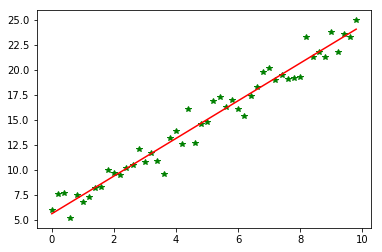

In [8]:
#!/usr/bin/python
#coding=utf-8
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# 构造训练数据
x = np.arange(0., 10., 0.2)
m = len(x)  # 训练数据点数目
print (m)
x0 = np.full(m, 1.0)
input_data = np.vstack([x0, x]).T  # 将偏置b作为权向量的第一个分量
target_data = 2 * x + 5 + np.random.randn(m)

# 两种终止条件
loop_max = 10000  # 最大迭代次数(防止死循环)
epsilon = 1e-3

# 初始化权值
np.random.seed(0)
theta = np.random.randn(2)

alpha = 0.001  # 步长(注意取值过大会导致振荡即不收敛,过小收敛速度变慢)
diff = 0.
error = np.zeros(2)
count = 0  # 循环次数
finish = 0  # 终止标志

while count < loop_max:
    count += 1

    # 标准梯度下降是在权值更新前对所有样例汇总误差，而随机梯度下降的权值是通过考查某个训练样例来更新的
    # 在标准梯度下降中，权值更新的每一步对多个样例求和，需要更多的计算
    sum_m = np.zeros(2)
    for i in range(m):
        dif = (np.dot(theta, input_data[i]) - target_data[i]) * input_data[i]
        sum_m = sum_m + dif  # 当alpha取值过大时,sum_m会在迭代过程中会溢出

    theta = theta - alpha * sum_m  # 注意步长alpha的取值,过大会导致振荡
    # theta = theta - 0.005 * sum_m      # alpha取0.005时产生振荡,需要将alpha调小

    # 判断是否已收敛
    if np.linalg.norm(theta - error) < epsilon:
        finish = 1
        break
    else:
        error = theta
    #print ('loop count = %d' % count, '\tw:',theta)
print ('loop count = %d' % count, '\tw:',theta)

# check with scipy linear regression
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, target_data)
print ('【intercept = %s】 【slope = %s】' % (intercept, slope))

plt.plot(x, target_data, 'g*')
plt.plot(x, theta[1] * x + theta[0], 'r-')
plt.show()